In [1]:
import cfgrib
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from baselines.data_processor import DataProcessor
from baselines.lgb.lgb_regressor import LightGBMRegressor

In [2]:
data, feature_list = DataProcessor.load_data('../../data2022_full.grib')
s = 5
fh = 3

processor = DataProcessor(data)
X, y = processor.preprocess(s, fh, use_neighbours=True)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

/Users/piotr/anaconda3/envs/engeneeringEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/piotr/anaconda3/envs/engeneeringEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/piotr/anaconda3/envs/engeneeringEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/piotr/anaconda3/envs/engeneeringEnv/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConve

t2m => RMSE:  2.44837; MAE: 2.0551578138524165; SE: 0.04709611971209065
sp => RMSE:  2.56924; MAE: 2.158567359300263; SE: 0.33804666378658677
tcc => RMSE:  0.38419; MAE: 0.3390588494639685; SE: 0.007120515926988893
u10 => RMSE:  1.89603; MAE: 1.5748143264527656; SE: 0.02905114966181755
v10 => RMSE:  1.66106; MAE: 1.2842702492995433; SE: 0.03533585937673533
tp => RMSE:  0.00034; MAE: 0.00013261279519056254; SE: 6.078393037301924e-06


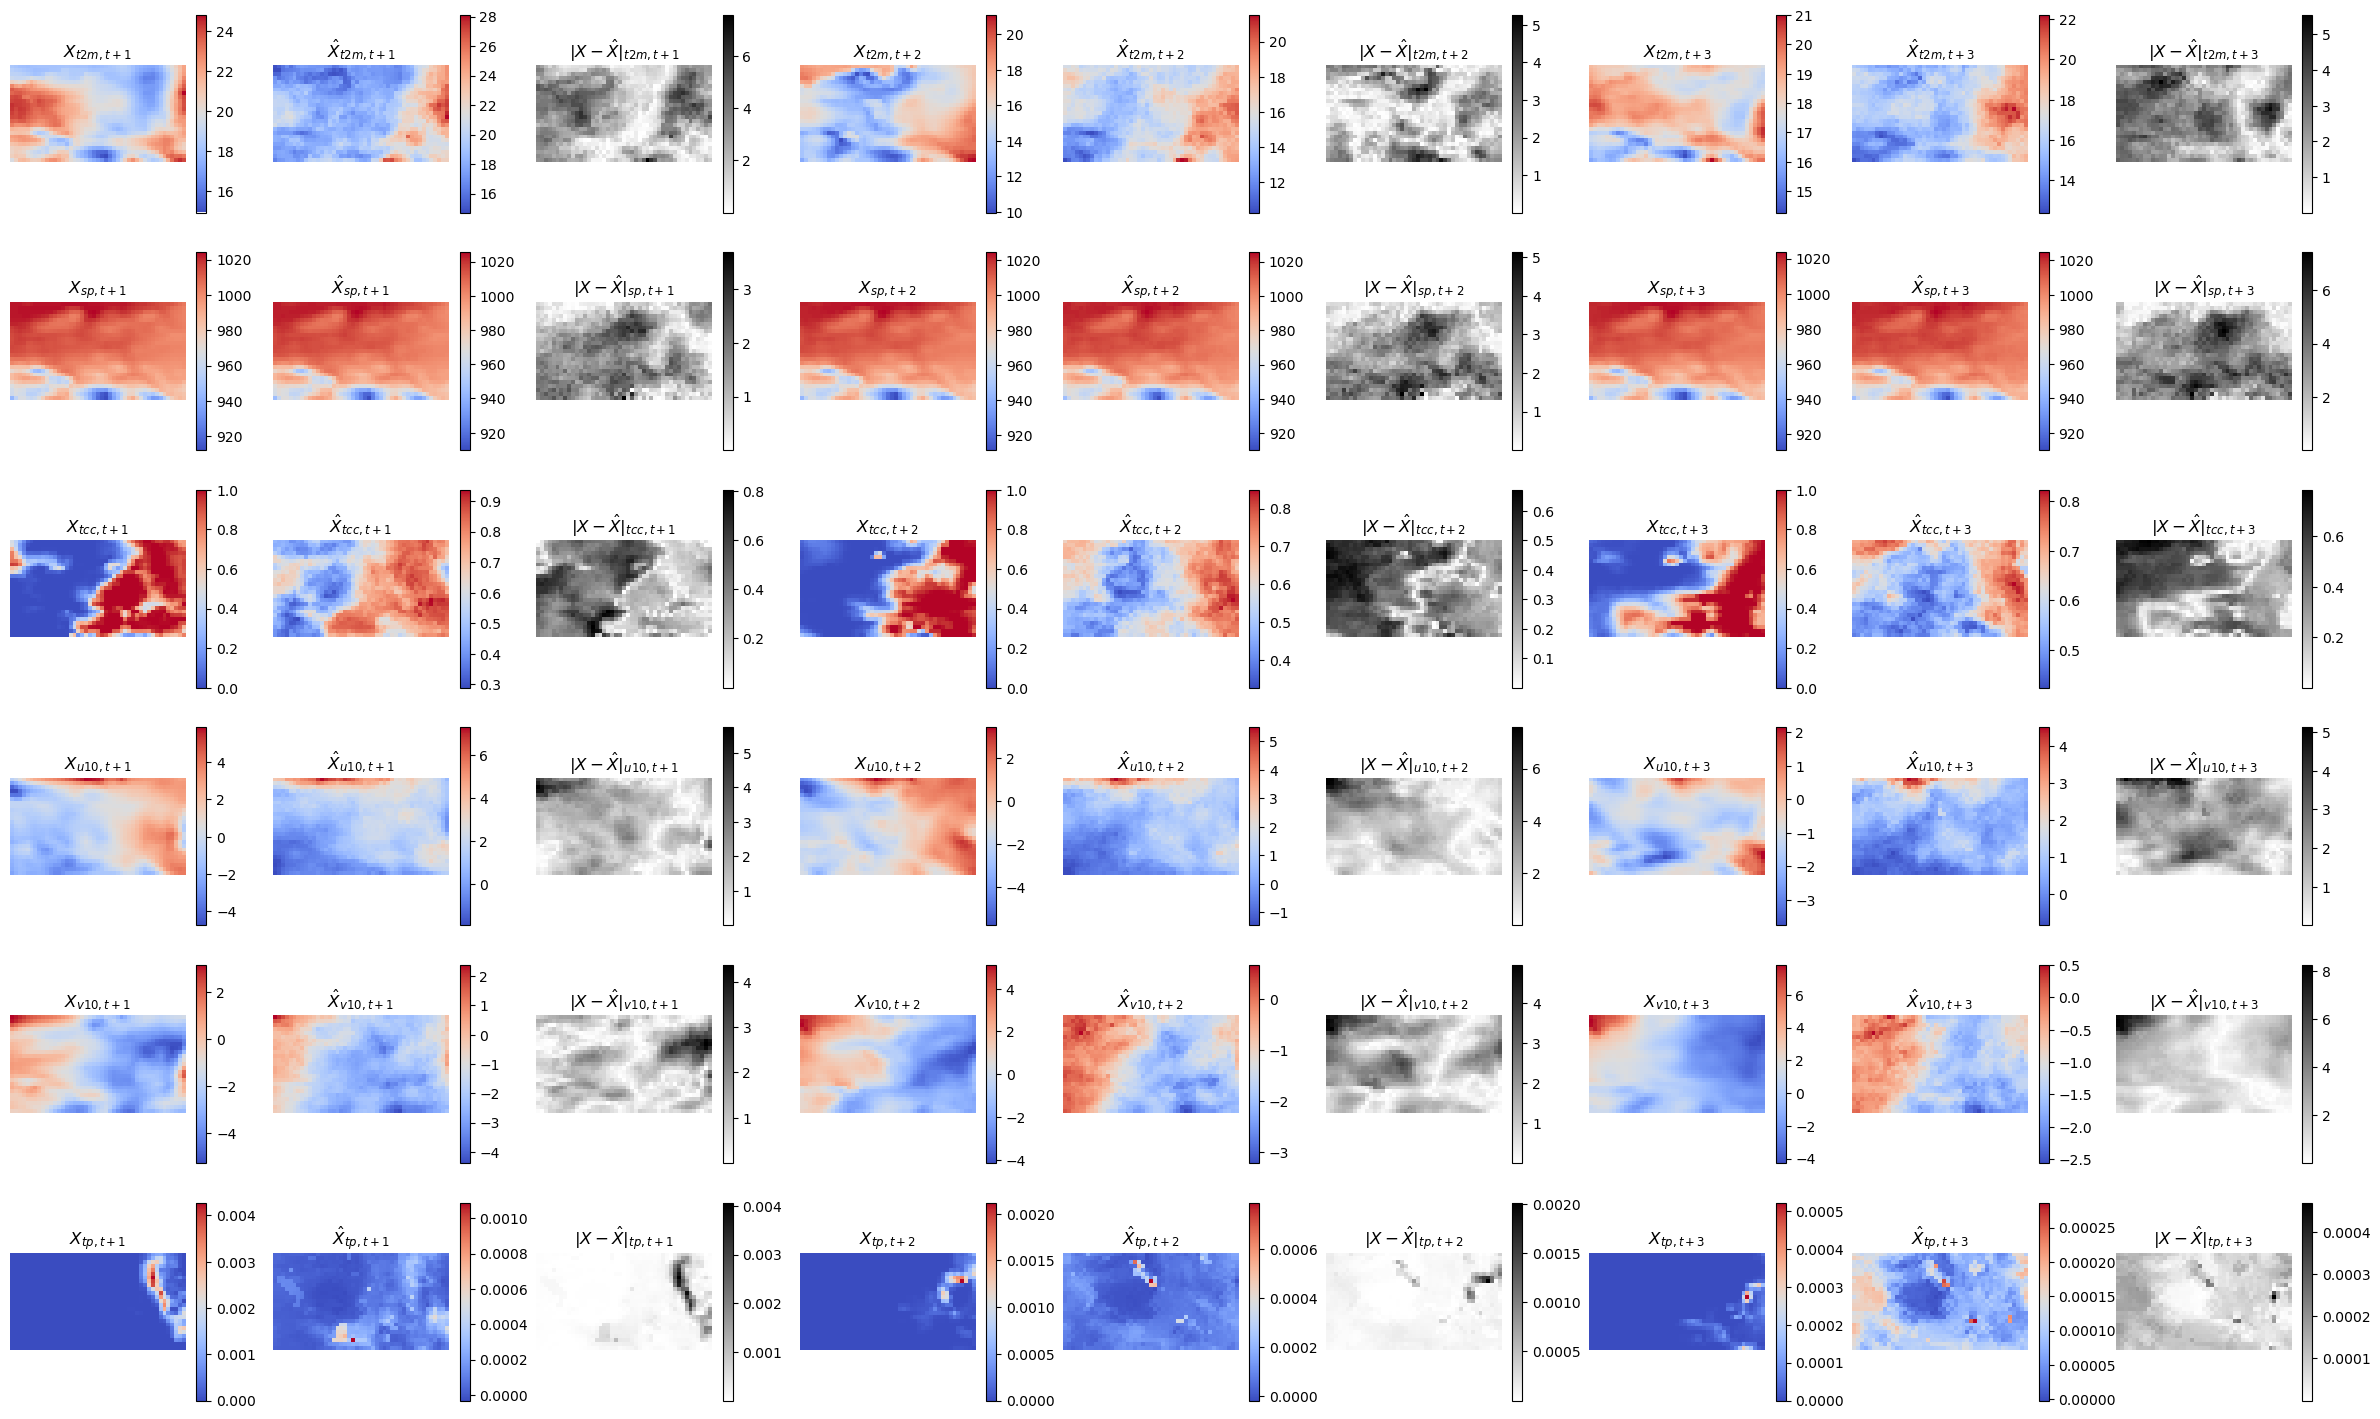

Evaluation metrics for entire test set:
t2m => RMSE: 2.283;  MAE: 1.745; SE: 0.005381185927832071
sp => RMSE: 2.752;  MAE: 1.975; SE: 0.01304289922054523
tcc => RMSE: 0.307;  MAE: 0.262; SE: 0.00021616313748960286
u10 => RMSE: 1.94;  MAE: 1.477; SE: 0.0018091433041795175
v10 => RMSE: 1.829;  MAE: 1.399; SE: 0.001546381703257767
tp => RMSE: 0.0;  MAE: 0.0; SE: 1.98601877847313e-07


 148.35155200958252 [S]


In [3]:
from time import time 
start = time()

regressor = LightGBMRegressor(X.shape, fh, feature_list)
regressor.train(X_train, y_train, normalize=True)
_ = regressor.predict_and_evaluate(X_test, y_test, max_samples=1)
print()
    
stop = time()
print('\n', stop-start, '[S]')

Best score s=5; fh=1

Evaluation metrics for entire test set:

t2m => RMSE: 1.746;  MAE: 1.329; SE: 0.006537278974024278

tcc => RMSE: 1.664;  MAE: 1.159; SE: 0.016475133023174895

u10 => RMSE: 0.286;  MAE: 0.228; SE: 0.00028511130329099296

v10 => RMSE: 1.475;  MAE: 1.093; SE: 0.0024523385946696313

tp => RMSE: 1.48;  MAE: 1.09; SE: 0.0020262920120716933

sp => RMSE: 0.0;  MAE: 0.0; SE: 2.2500528758443794e-077

<br>

Performance with neighbours is slightly better but does not compensate enough computation time and memory footprint

t2m => RMSE: 1.726;  MAE: 1.314; SE: 0.006537278974024278

sp => RMSE: 1.628;  MAE: 1.144; SE: 0.016475133023174895

tcc => RMSE: 0.283;  MAE: 0.224; SE: 0.00028511130329099296

u10 => RMSE: 1.441;  MAE: 1.067; SE: 0.0024523385946696313

v10 => RMSE: 1.45;  MAE: 1.067; SE: 0.0020262920120716933

tp => RMSE: 0.0;  MAE: 0.0; SE: 2.2500528758443794e-07